# Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
    
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases


2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions


3.	Married - This refers to applicant being in a state of matrimony


4.	Dependents - This refres to persons who depends on the applicants for survival


5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university


6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer


7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.


8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.


9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.


10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant


11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.


13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


# Importing Libraries

In [1080]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Importing Datasets

In [1081]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1082]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Top 10 rows of the dataset

In [1083]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Last 10 rows of the dataset

In [1084]:
df.shape

(614, 13)

The dataset has 614 rows and 13 columns in which 12 columns are dependent and one column is independent 

# Exploratory Data Analysis [EDA]

In [1085]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

Here we can see the list of all the columns present in the dataset.

In [1086]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

It is showing the data types present in the each column of the dataset and this dataset has three types of data present ['object', 'int64', 'float64'] 

In [1087]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we can get a general information about the dataset like total number of non-null values present in the dataset, types of data present in the dataset, memory occupied by the dataset. 

# Checking For duplicate values

In [1088]:
df.duplicated().sum()

0

AS we can see here that there are no duplicated values present in the dataset. 

# Checking for white space

In [1089]:
# Check for white spaces
has_white_spaces = ' ' in df
print(has_white_spaces)

False


We can say that there is no white space present in the dataset.

# Checking for the null values 

In [1090]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that null values are present in the dataset columns [Gender has 13, Married has 3,Dependents has 15,Self_Employed has 32, LoanAmount has 22, Loan_Amount_Term has 14,Credit_History has 50] null values present 

<AxesSubplot:>

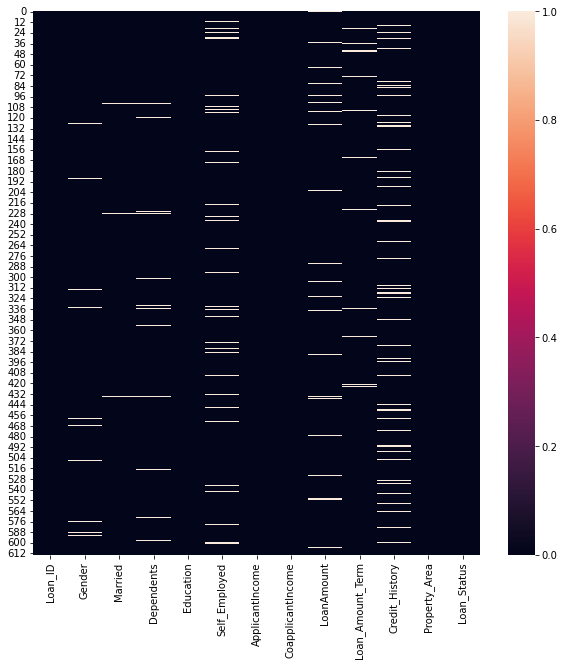

In [1091]:
#visualization for null values using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

By visualizing with heatmap we can see that the white color is showing that null value are present in the dataset.

# Treating Null Values 

The columns Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History are seems to be categorical so will fill the missing values using their mode values method.

In [1092]:
print("The mode of Gender is:",df["Gender"].mode()) 
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of  Self_Employed  is:",df["Self_Employed"].mode())
print("The mode of Credit_History  is:",df["Credit_History"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())

The mode of Gender is: 0    Male
Name: Gender, dtype: object
The mode of Married is: 0    Yes
Name: Married, dtype: object
The mode of Dependents is: 0    0
Name: Dependents, dtype: object
The mode of  Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64
The mode of Loan_Amount_Term is: 0    360.0
Name: Loan_Amount_Term, dtype: float64


This mode values are the values which are highly repeated in the columns so we will fill null values present in the columns with this mode values 

In [1093]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

LoanAmount columns is a continuous column so we will use median method to fill the null value in that column 

In [1094]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [1095]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we can say that we have treated all the null values present in the dataset and there are no null values present in the dataset.

<AxesSubplot:>

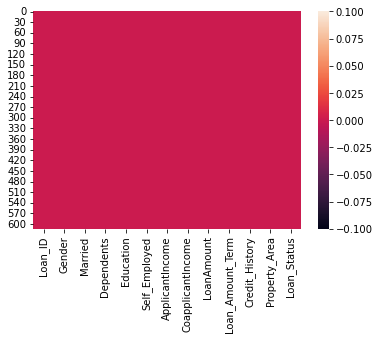

In [1096]:
#checking with heatmap for null values
sns.heatmap(df.isnull())

By visualizing with heatmap we can say that there are no null values present in the dataset.

In [1097]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Observation

1. There is a huge difference between 75th percentile and max value so we can say that there are outliers are present in the dataset.


2. In columns ApplicantIncome, CoapplicantIncome, LoanAmount mean is greater than median so we can say that skewness is present in the dataset and skewed to the right .


3. count of each of the column is same so we can say that there are no null values present in the dataset. 


4. We can also observe count, mean, std, min., max., 25th,50th,75th percentile values for each of the columns 

### Checking for number of unique values in our target variable

In [1098]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [1099]:
df['Loan_Status'].nunique()

2

In [1100]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

As we can see here that our target variable has 2 unique values yes and no where yes=422 & no=192 

# Separating Categorical columns and Numerical columns 

In [1101]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Here we can see the unique count for each of the columns present in the dataset.

### For Categorical columns

In [1102]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


This are the categorical columns present in the dataset.

### For Numerical columns 

In [1103]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)   

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


This are the numerical columns present in the dataset.

### Droping unwanted columns from the dataset

In [1104]:
df.drop("Loan_ID",axis=1,inplace=True)

since column 'Loan_ID' is not playing any major role in analysing the data so we drop it. 

In [1105]:
df.shape

(614, 12)

In [1106]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see here that column 'Loan_ID' is removed from the dataset

# Data Visualization

### Univarient Analysis 

Y    422
N    192
Name: Loan_Status, dtype: int64


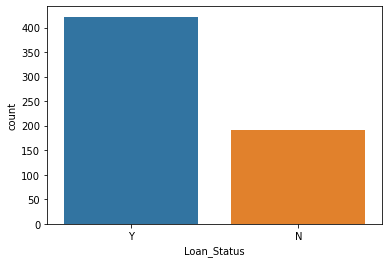

In [1107]:
#visualizing loan status 
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

from the above graph we can say that More number of loan has been approved that is Y=422 and N=192 has got denied.

Male      502
Female    112
Name: Gender, dtype: int64


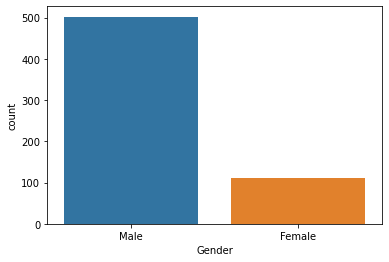

In [1108]:
#visualizing gender column
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

There are more number of Male applicants applying for loan than Female applicants. Total 502 male have applied for loan and 112 female have applied for loan

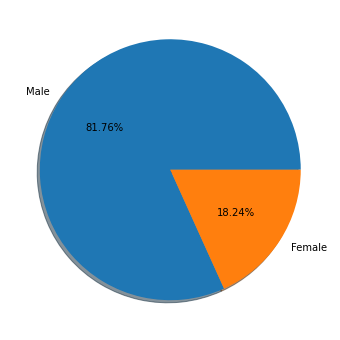

In [1109]:
#visualizing with pie chart for gender column
labels='Male','Female'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,)
plt.show()

There are about 81.76% of the Male candidates and only 18.24% of Female candidates are applying for the loan.

Yes    401
No     213
Name: Married, dtype: int64


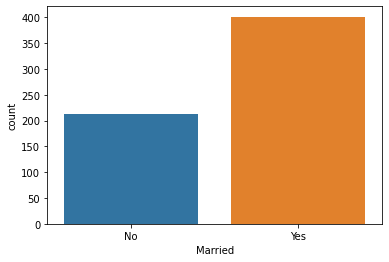

In [1110]:
#visualizing married column 
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

The married people has apllied more for loan than the unmaried people. total 401 married people has applied for loan and 213 unmarried people has applied for loan 

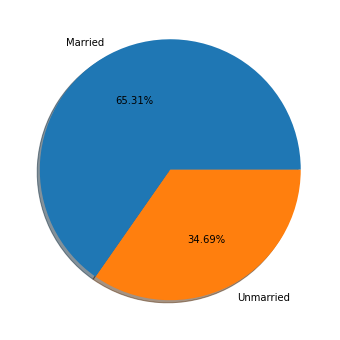

In [1111]:
#visualizing married column with pie chart
labels='Married','Unmarried'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['Married'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There are about 65.31% of the Married candidates and only 34.69% of Unmarried candidates are applying for the loan

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


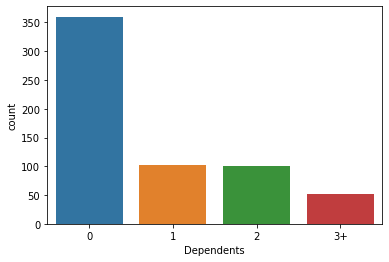

In [1112]:
#visualizing dependent column
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

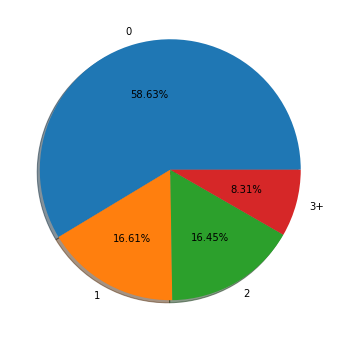

In [1113]:
#visualizing Dependents column with pie chart
labels='0','1','2','3+'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Here we can see that o dependent are highest with 59.79% than 1 and 2 and 3+ dependent are coming with 16.46%, 16.12%, 7.63%

No     532
Yes     82
Name: Self_Employed, dtype: int64


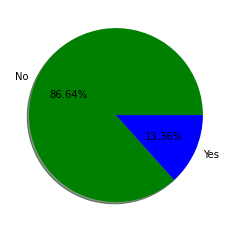

In [1114]:
#visualizing self_employed column with pie chart
print(df["Self_Employed"].value_counts())
labels='No','Yes'
colors = ["green", "b"]
fig, ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the loan applicants are not self employed. 532 peoples are not self employed and 82 people are self emplyed. 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


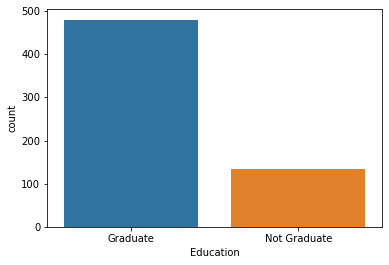

In [1115]:
#visualizing education column 
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

More number of people applied for loan are Graduates and few applicants are Not Graduates. Total 480 graduate has applied for loan and 134 not graduate have applied for loan 

1.0    525
0.0     89
Name: Credit_History, dtype: int64


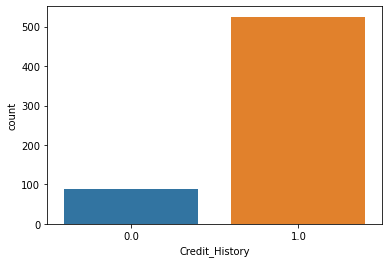

In [1116]:
#visualizing credit history column
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are higher in numbers. 

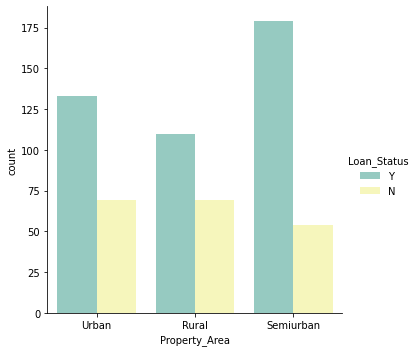

In [1117]:
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set3")

Applicants having property in semiurban area has more chance of getting loan approved

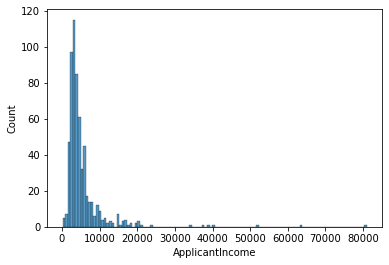

In [1118]:
#visualizing applicant income column 
sns.histplot(df['ApplicantIncome'])
plt.show()

Most of the applicant has income between 0 to 10000 

### Bivarient Analysis 

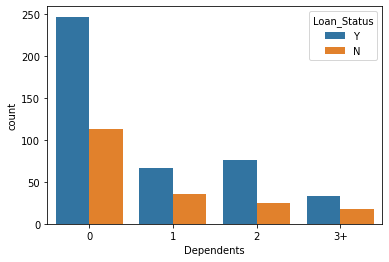

In [1119]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

people with 0 dependent getting more approval of loan than 1,2,3+ dependent 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


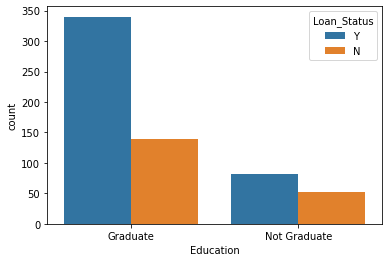

In [1120]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Most of the applicants who are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated have tendency of getting loans than who are not.

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

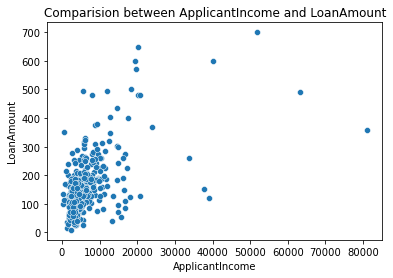

In [1121]:
#Comparision between features using scatter plot
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'])

With increase of applicant income loan amount is also increasing 

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

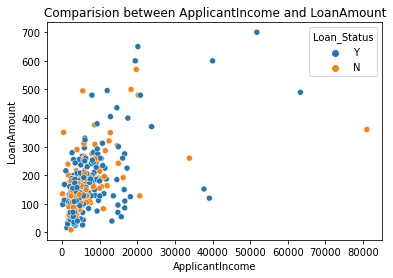

In [1122]:
#Comparision between features using scatter plot
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

A high density of points in the range of 0-20000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

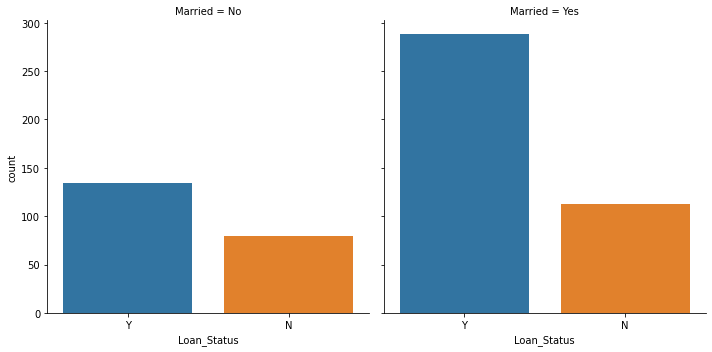

In [1123]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Married',data=df,kind='count')

The married people has high tendency to get approval of loan than unmarried people

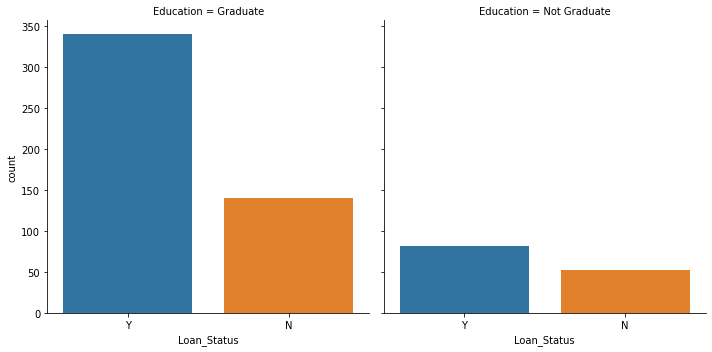

In [1124]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Education',data=df,kind='count')

The graduate has higher tendency to get approval of loan

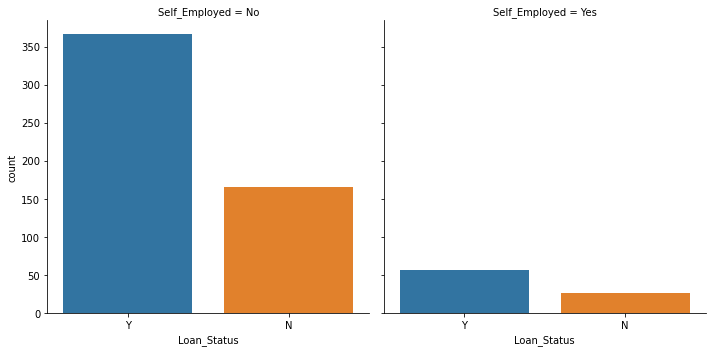

In [1125]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count')

Applicants who are not self employed has more chance of getting loan approved.

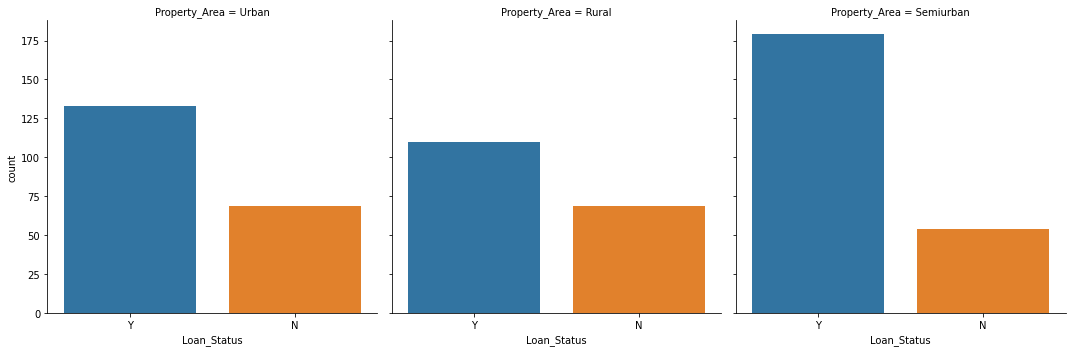

In [1126]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Property_Area',data=df,kind='count')

semiurban area has higher tendecy to get approval of loan than urban or rural

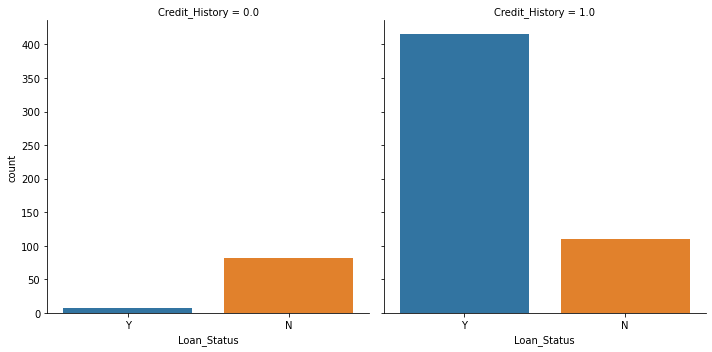

In [1127]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Credit_History',data=df,kind='count')

the chances of getting approval of loan is higher with credit history 1.0

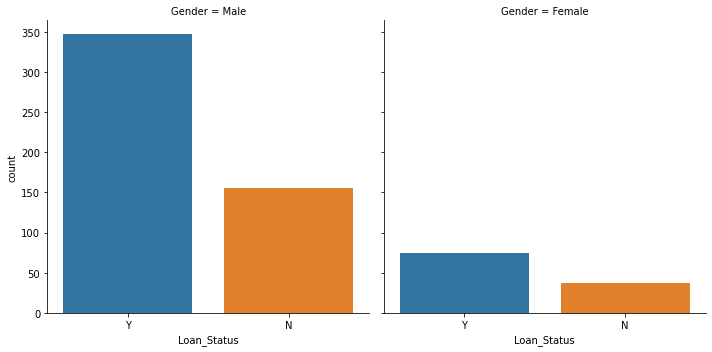

In [1128]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Gender',data=df,kind='count')

male has applied more for loan than female and male get more approval of loan than female 

<AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

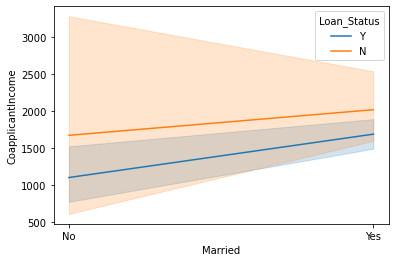

In [1129]:
# Let's plot catplot for pair of features
sns.lineplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", data=df)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


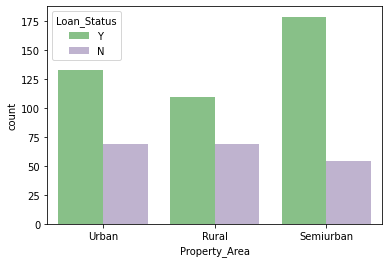

In [1130]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="Accent")
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.

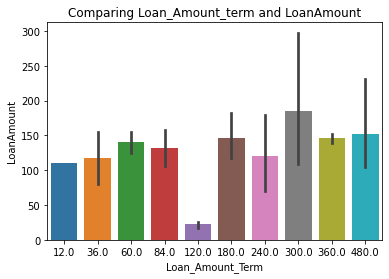

In [1131]:
#Comparing Loan_Amount_term and LoanAmount
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

The loan amount term 300.0 is high with loan amount compared to others.

### Multivarient Analysis 

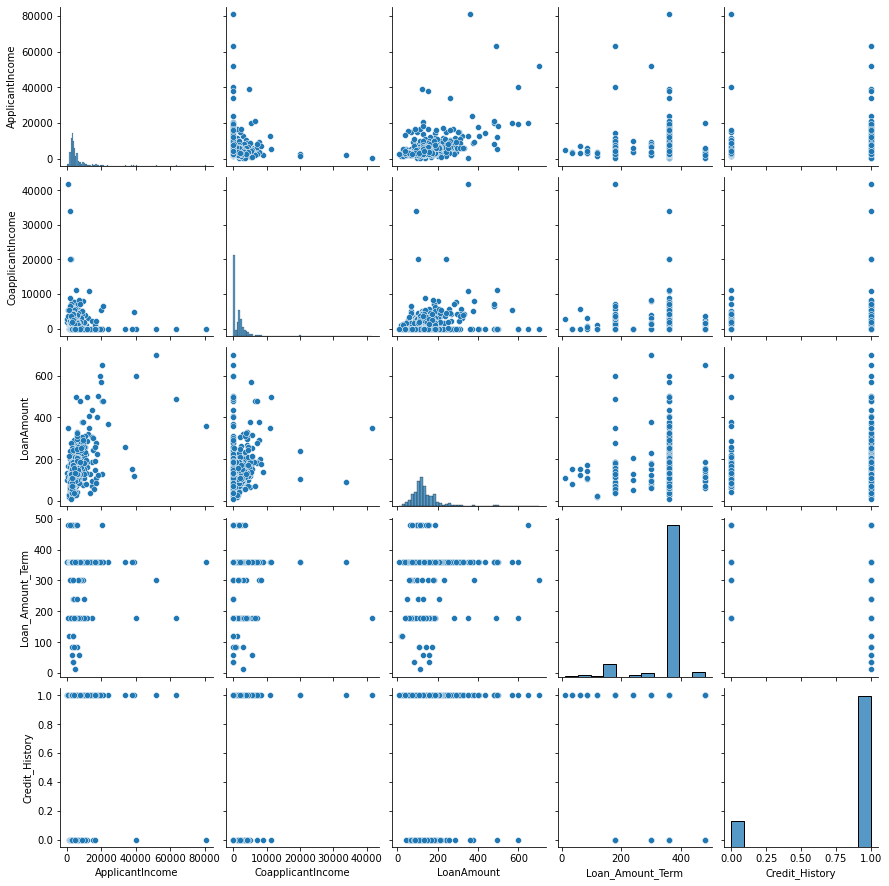

In [1132]:
sns.pairplot(df)

We can see the pairplot of the dataset.

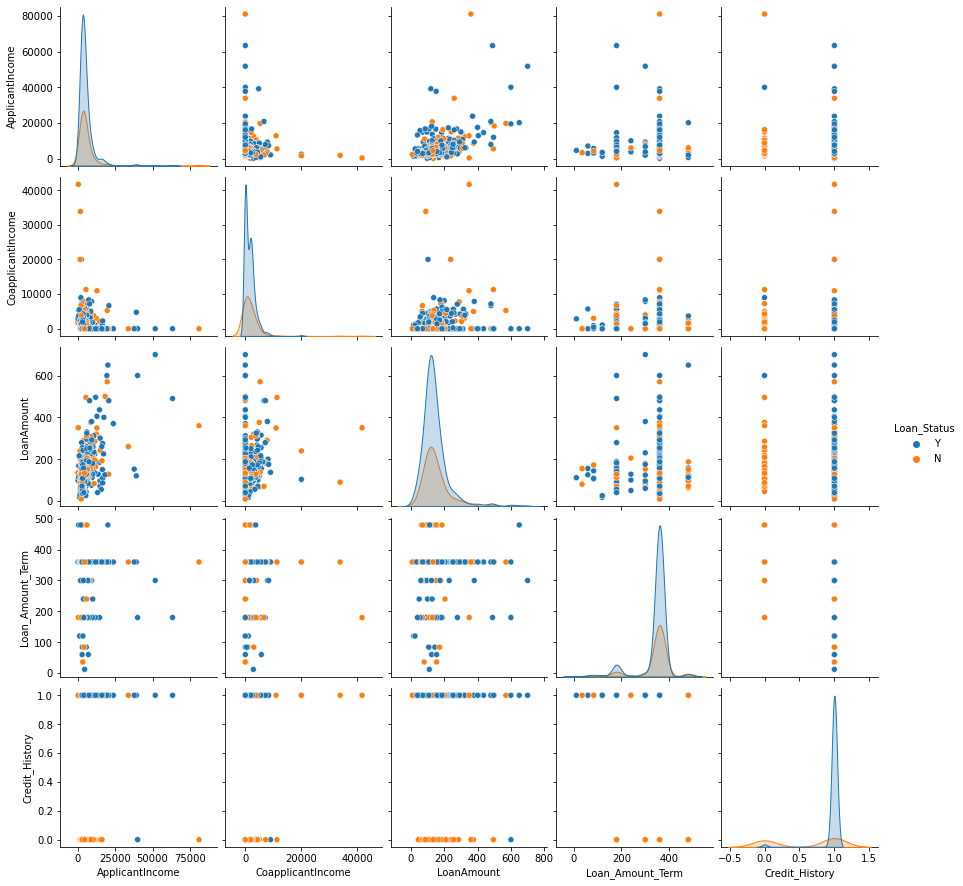

In [1133]:
sns.pairplot(df, hue='Loan_Status')

The pair plot for having Laon_Status as target.

# Checking for outliers

we never check the presence of outliers from categorical columns and label columns

To check the presence of outliers we use boxplot visualization that the outliers are present or not 

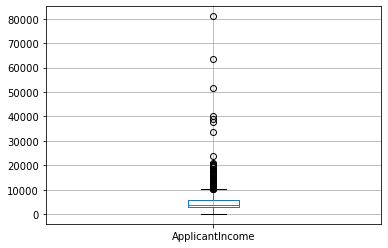

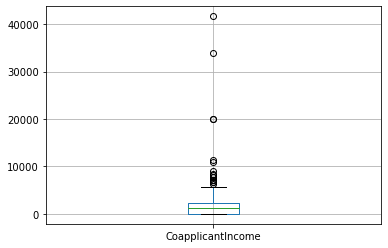

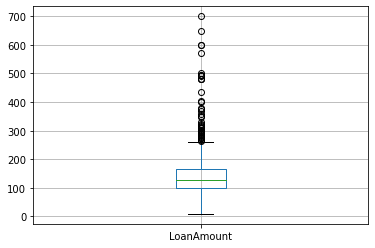

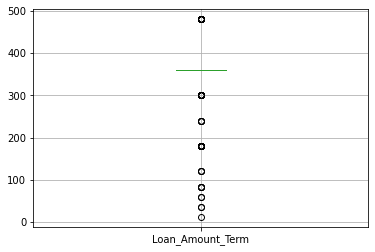

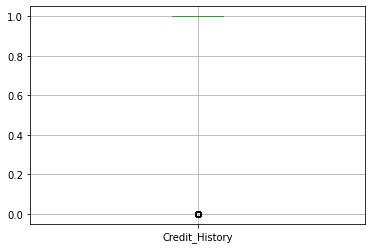

In [1134]:
for i in numerical_col:
    df.boxplot(i)
    plt.show()

Here by visualizing with boxplot we can see that outliers are present in the dataset. so now we have to remove the outliers from the dataset.

# Removing Outliers

In [1135]:
#Removing outliers
from scipy.stats import zscore
columns = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(columns))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [1136]:
#threshold value =3
threshold=3

print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [1137]:
df_new=df[(z<3).all(axis=1)]

df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1138]:
df_new.shape

(577, 12)

In [1139]:
df.shape

(614, 12)

In [1140]:
#Checking dataloss
Dataloss = (((614-577)/614)*100)
Dataloss

6.026058631921824

Data loss percentage is approx 6% which is  less than 10% so we can proceed with the data.

In [1141]:
df=df_new

In [1142]:
df.shape

(577, 12)

# Check for skewness

In [1143]:
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Accpectable range for skewness is -0.5 to +0.5 so we can say that skewness is present in the dataset and we have to treat the skewness.

We will use square root method to treat the skewness present in the dataset

In [1144]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])
df['Loan_Amount_Term']=np.sqrt(df['Loan_Amount_Term'])
df['Credit_History']=np.sqrt(df['Credit_History'])

In [1145]:
df.skew()

ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.473358
Credit_History      -1.976043
dtype: float64

In [1146]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])

In [1147]:
df.skew()

ApplicantIncome      0.638310
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.473358
Credit_History      -1.976043
dtype: float64

In [1148]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])

In [1149]:
df.skew()

ApplicantIncome      0.270200
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.473358
Credit_History      -1.976043
dtype: float64

In [1150]:
import scipy
from scipy.stats import boxcox

In [1151]:
df['Loan_Amount_Term']=boxcox(df['Loan_Amount_Term'],0)

In [1152]:
df.skew()

ApplicantIncome      0.270200
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.738536
Credit_History      -1.976043
dtype: float64

In [1153]:
df['Credit_History']=np.sqrt(df['Credit_History'])

In [1154]:
df.skew()

ApplicantIncome      0.270200
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.738536
Credit_History      -1.976043
dtype: float64

In [1155]:
df.skew()

ApplicantIncome      0.270200
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.738536
Credit_History      -1.976043
dtype: float64

we can see here skewness is removed, This best result we got cant handle can't treat more.

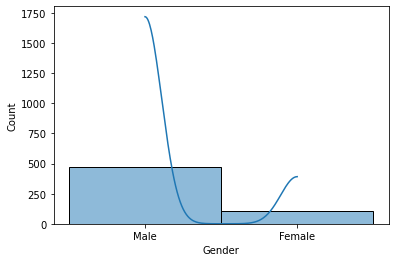

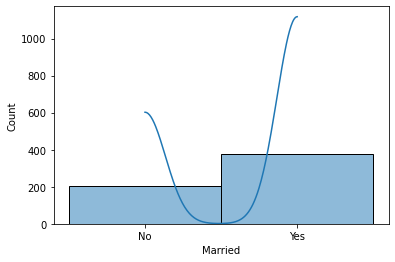

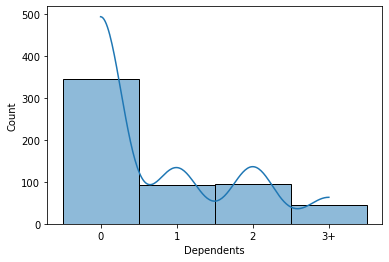

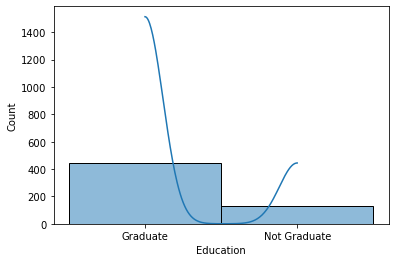

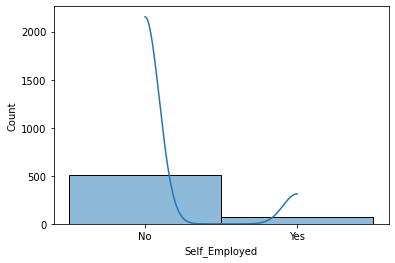

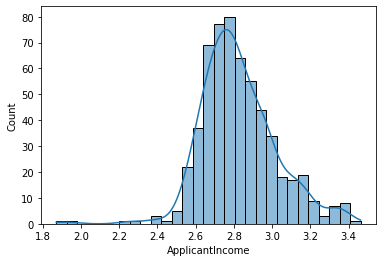

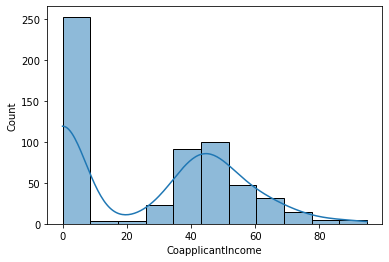

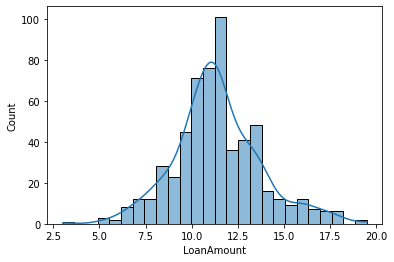

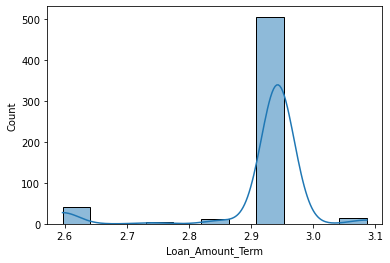

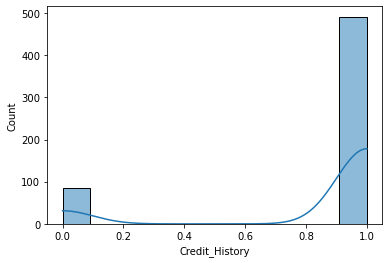

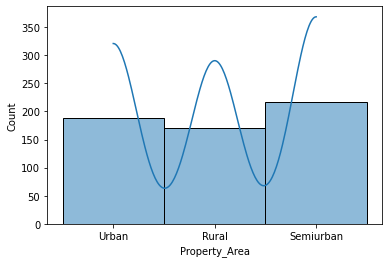

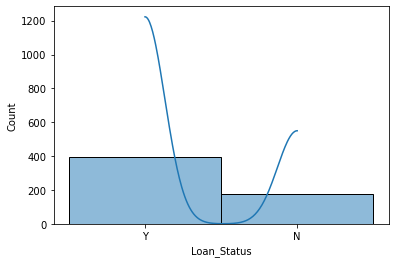

In [1156]:
#checking for skewness by visualizing
for i in df.columns:
    sns.histplot(df[i], kde= True)
    plt.show()

Here with the help of visualization we can see that skewness is removed from the datasset

# Encoding the categorical columns using Label Encoding

In [1157]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lb.fit_transform(df[i].values)

# Correlation between target variable and independent variables

In [1158]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.056443,0.223579,0.169132,-0.104153,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.023065,0.301532,0.178289,-0.122680,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105192,-0.015384,0.133323,-0.087414,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.177365,0.010786,-0.135408,-0.098450,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.217585,-0.068739,0.118771,-0.023497,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.056443,-0.023065,0.105192,-0.177365,0.217585,1.000000,-0.324398,0.445109,-0.058382,0.030280,-0.011970,-0.003216
CoapplicantIncome,0.223579,0.301532,-0.015384,0.010786,-0.068739,-0.324398,1.000000,0.256937,-0.024828,-0.002648,-0.087549,0.064145
LoanAmount,0.169132,0.178289,0.133323,-0.135408,0.118771,0.445109,0.256937,1.000000,0.055818,0.000282,-0.093267,-0.025614
Loan_Amount_Term,-0.104153,-0.122680,-0.087414,-0.098450,-0.023497,-0.058382,-0.024828,0.055818,1.000000,0.036920,-0.065588,-0.006290
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.030280,-0.002648,0.000282,0.036920,1.000000,-0.008121,0.560936


<AxesSubplot:>

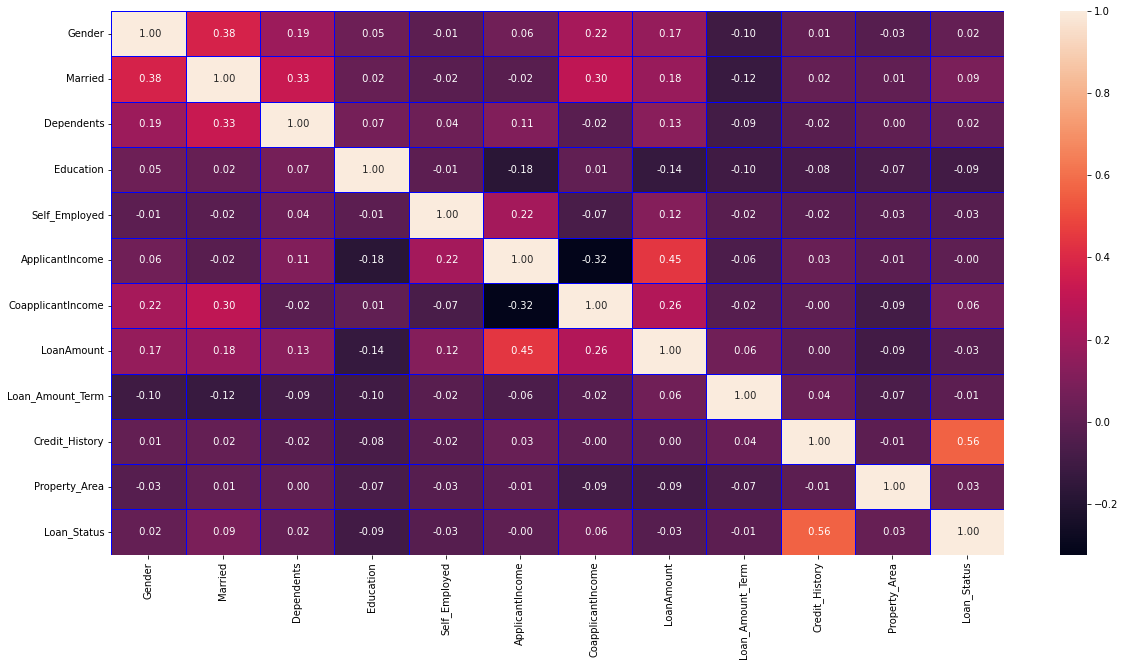

In [1159]:
plt.figure(figsize=(20,10))

sns.heatmap(cor,annot= True,linewidths=1,linecolor='blue',fmt=' .2f' )

### Observations

1. The target column Loan_Status is highly positively correlated with the feature Credit_History.


2. The other features have very less correlation with the target column.


3. ApplicantIncome and Gender is very less correlated with the target.


4. Dark shades are highly correlated and light shades are very less correlated.

In [1160]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.064145
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.003216
Loan_Amount_Term    -0.006290
LoanAmount          -0.025614
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

Loan_Status is highly corealted with Credit_History.       

# Visualizing the correlation between label and features 

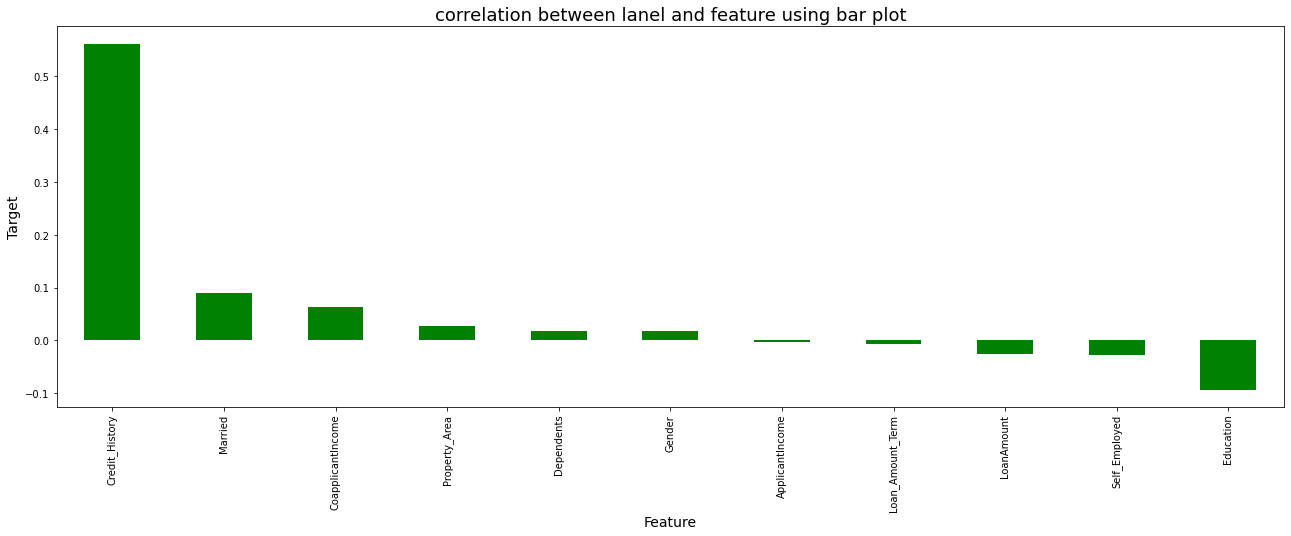

In [1161]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Here we see after visualization that column ApplicantIncome, gender, Loan_amount_Term has very less corelation with target variable 

# Seprating features and label

In [1162]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [1163]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,2.957231,0.000000,11.313708,2.943052,1.0,2
1,1,1,1,0,0,2.868427,38.832976,11.313708,2.943052,1.0,0
2,1,1,0,0,1,2.720446,0.000000,8.124038,2.943052,1.0,2
3,1,1,0,1,0,2.670026,48.559242,10.954451,2.943052,1.0,2
4,1,0,0,0,0,2.966668,0.000000,11.874342,2.943052,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2.708942,0.000000,8.426150,2.943052,1.0,0
610,1,1,3,0,0,2.829289,0.000000,6.324555,2.596478,1.0,0
611,1,1,1,0,0,3.078737,15.491933,15.905974,2.943052,1.0,2
612,1,1,2,0,0,3.054781,0.000000,13.674794,2.943052,1.0,2


In [1164]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [1165]:
x.shape

(577, 11)

In [1166]:
y.shape

(577,)

# Feature Scaling using Standard Scalarization

In [1167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.670595,-1.048379,-0.034832,0.259077,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.216591,0.444242,-0.034832,0.259077,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.539946,-1.048379,-1.395808,0.259077,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.797714,0.818090,-0.188121,0.259077,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.718841,-1.048379,0.204380,0.259077,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.598760,-1.048379,-1.266903,0.259077,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.016505,-1.048379,-2.163616,-3.415117,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.291789,-0.452917,1.924606,0.259077,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.169316,-1.048379,0.972601,0.259077,0.418513,1.227472


We have scaled the data using standard scalarization method to overcome the issue of biasness we have use standard scaler which will convert dataset into mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking for multicolinearity

In [1168]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.219691,Gender
1,1.385166,Married
2,1.174409,Dependents
3,1.074657,Education
4,1.054152,Self_Employed
5,1.801412,ApplicantIncome
6,1.603767,CoapplicantIncome
7,1.673700,LoanAmount
8,1.062527,Loan_Amount_Term
9,1.009813,Credit_History


Column ['ApplicantIncome', 'Loan_Amount_Term'] have vif value more than 10 so we have to drop a column and again check the vif values to see that multicolinearity is removed or not 

In [1169]:
# Drop column Total volume

x.drop('ApplicantIncome', axis = 1, inplace = True)

In [1170]:
# check again the VIF values

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.211138,Gender
1,1.384686,Married
2,1.174055,Dependents
3,1.051805,Education
4,1.028562,Self_Employed
5,1.214645,CoapplicantIncome
6,1.169379,LoanAmount
7,1.043379,Loan_Amount_Term
8,1.008616,Credit_History
9,1.027747,Property_Area


In [1171]:
# Drop column Total volume

x.drop('Loan_Amount_Term', axis = 1, inplace = True)

In [1172]:
# check again the VIF values

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.205860,Gender
1,1.376290,Married
2,1.171730,Dependents
3,1.044927,Education
4,1.027256,Self_Employed
5,1.214533,CoapplicantIncome
6,1.162730,LoanAmount
7,1.007590,Credit_History
8,1.023177,Property_Area


here we can see that multicolinearity is removed from the dataset and we can proceed further

# Oversampling method for balancing of the data set

In [1173]:
#Checking value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [1174]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [1175]:
#Checking value count of target column
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Here we can see that both 0 & 1 has equal number of values we use this to prevent the biaseness in the dataset

# Modeling

Since the outcome has only two variable we will use binary clasification model

In [1176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Finding Best Random State

In [1177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8535564853556485  on Random_state  93


# Creating train_test split

In [1178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Logistic Regression

In [1179]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7447698744769874
[[ 66  48]
 [ 13 112]]
              precision    recall  f1-score   support

           0       0.84      0.58      0.68       114
           1       0.70      0.90      0.79       125

    accuracy                           0.74       239
   macro avg       0.77      0.74      0.73       239
weighted avg       0.76      0.74      0.74       239



### cross validation

In [1180]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Predict using logistic regression
pred_lr = LR.predict(x_test)

# Calculate the accuracy score
lss = accuracy_score(y_test, pred_lr)

# Perform cross-validation for different folds
for j in range(2, 15):
    # Calculate cross-validation scores
    cv_scores = cross_val_score(LR, x, y, cv=j)
    mean_cv_score = cv_scores.mean()
    
    # Display the results
    print('At cv:', j)
    print('Cross-validation score is:', mean_cv_score * 100)
    print('Accuracy score is:', lss * 100)
    print('\n')

At cv: 2
Cross-validation score is: 69.84924623115577
Accuracy score is: 74.47698744769873


At cv: 3
Cross-validation score is: 69.59568733153638
Accuracy score is: 74.47698744769873


At cv: 4
Cross-validation score is: 70.7286432160804
Accuracy score is: 74.47698744769873


At cv: 5
Cross-validation score is: 70.47955974842768
Accuracy score is: 74.47698744769873


At cv: 6
Cross-validation score is: 69.84791524265209
Accuracy score is: 74.47698744769873


At cv: 7
Cross-validation score is: 70.59573713043672
Accuracy score is: 74.47698744769873


At cv: 8
Cross-validation score is: 70.08838383838383
Accuracy score is: 74.47698744769873


At cv: 9
Cross-validation score is: 69.9736125297923
Accuracy score is: 74.47698744769873


At cv: 10
Cross-validation score is: 70.84493670886076
Accuracy score is: 74.47698744769873


At cv: 11
Cross-validation score is: 70.4735713297357
Accuracy score is: 74.47698744769873


At cv: 12
Cross-validation score is: 70.60530679933665
Accuracy score i

At cv: 10


Cross-validation score is: 70.84493670886076


Accuracy score is: 74.47698744769873

In [1211]:
lsscore_selected=cross_val_score(LR,x,y,cv=10).mean()
print('The cv Score is:', lsscore_selected, '\n The accuracy score is:', lss)

The cv Score is: 0.7084493670886076 
 The accuracy score is: 0.7447698744769874


In [1212]:
print('Difference between Accuracy score and cross validation score is -',lss - lsscore_selected)

Difference between Accuracy score and cross validation score is - 0.036320507388379775


# Importing Models

In [1183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Lasso,Ridge

# DecisionTree Classifier

In [1184]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC=DTC.predict(x_test)
print('Accuracy Score',accuracy_score(y_test, predDTC))
print('Confusion Matrix',confusion_matrix(y_test, predDTC))
print('Classification Report',classification_report(y_test,predDTC))

Accuracy Score 0.7698744769874477
Confusion Matrix [[85 29]
 [26 99]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.75      0.76       114
           1       0.77      0.79      0.78       125

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



### Cross validation score DTC

In [1185]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predDTC) - cvscore.mean())

[0.7375     0.74842767 0.76100629 0.78616352 0.78616352]
0.7638522012578617
Difference between Accuracy score and cross validation score is - 0.006022275729586024


# Support Vector Classifier

In [1186]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predsvc))
print('Confusion Matrix', confusion_matrix(y_test,predsvc))
print('Classification Report', classification_report(y_test,predsvc))

Accuracy Score 0.7615062761506276
Confusion Matrix [[ 81  33]
 [ 24 101]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.71      0.74       114
           1       0.75      0.81      0.78       125

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



### cross validation score for SVC

In [1187]:
#using k-fold cross validation for support vector classifier
cvscore=cross_val_score(svc,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predsvc) - cvscore.mean())

[0.725      0.77987421 0.77358491 0.70440252 0.77987421]
0.7525471698113207
Difference between Accuracy score and cross validation score is - 0.008959106339306855


# K-Neighbors Classifier

In [1188]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN= KNN.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predKNN))
print('Confusion Matrix', confusion_matrix(y_test,predKNN))
print('Classification Report', classification_report(y_test,predKNN))

Accuracy Score 0.7573221757322176
Confusion Matrix [[91 23]
 [35 90]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.80      0.76       114
           1       0.80      0.72      0.76       125

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



### cross validation scor for KNN

In [1189]:
#Using k-fold cross validation for K-Neighbour Classifier

cvscore=cross_val_score(KNN,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predKNN)- (cvscore.mean()))

[0.73125    0.77358491 0.80503145 0.70440252 0.83018868]
0.7688915094339622
Difference between Accuracy score and cross validation score is - -0.011569333701744622


# Random Forest Classifier

In [1190]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8451882845188284
[[ 96  18]
 [ 19 106]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       114
           1       0.85      0.85      0.85       125

    accuracy                           0.85       239
   macro avg       0.84      0.85      0.84       239
weighted avg       0.85      0.85      0.85       239



### cross validation score for RFC

In [1191]:
#Using k-fold cross validation for Random Forest Classifier

cvscore=cross_val_score(RFC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predRFC) - cvscore.mean())

[0.75625    0.7672956  0.8490566  0.86792453 0.8427673 ]
0.8166588050314466
Difference between Accuracy score and cross validation score is - 0.028529479487381826


# Gradient Boosting Classifier

In [1192]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predGB))
print('Confusion Matrix', confusion_matrix(y_test,predGB))
print('Classification Report', classification_report(y_test,predGB))

Accuracy Score 0.7949790794979079
Confusion Matrix [[ 89  25]
 [ 24 101]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.78      0.78       114
           1       0.80      0.81      0.80       125

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



### cross validation for GB

In [1193]:
#using k-fold cross validation for gradient boosting classifier
cvscore=cross_val_score(GB,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predGB) - cvscore.mean())

[0.7125     0.73584906 0.85534591 0.81132075 0.8427673 ]
0.7915566037735848
Difference between Accuracy score and cross validation score is - 0.003422475724323082


# ExtraTreeClassifier

In [1194]:
#checking accuracy for ExtraTreeClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predET))
print('Confusion Matrix', confusion_matrix(y_test,predET))
print('Classification Report', classification_report(y_test,predET))

Accuracy Score 0.8242677824267782
Confusion Matrix [[ 94  20]
 [ 22 103]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.82       114
           1       0.84      0.82      0.83       125

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



### cross validation score for ET

In [1195]:
#using k-fold cross validation for ExtraTrees classifier
cvscore=cross_val_score(ET,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predET) - cvscore.mean())

[0.7625     0.77987421 0.85534591 0.88050314 0.8490566 ]
0.8254559748427672
Difference between Accuracy score and cross validation score is - -0.0011881924159889978


# AdaBoost Classifier

In [1196]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC=ABC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predABC))
print('Confusion Matrix', confusion_matrix(y_test,predABC))
print('Classification Report', classification_report(y_test,predABC))

Accuracy Score 0.7656903765690377
Confusion Matrix [[ 78  36]
 [ 20 105]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.68      0.74       114
           1       0.74      0.84      0.79       125

    accuracy                           0.77       239
   macro avg       0.77      0.76      0.76       239
weighted avg       0.77      0.77      0.76       239



### cross validation for ABC

In [1197]:
#using k-fold cross validation for Adaboosting classifier
cvscore=cross_val_score(ABC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predABC) - cvscore.mean())

[0.69375    0.71698113 0.79874214 0.82389937 0.78616352]
0.7639072327044025
Difference between Accuracy score and cross validation score is - 0.0017831438646351838


# Bagging Classifier

In [1198]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predBC))
print('Confusion Matrix', confusion_matrix(y_test,predBC))
print('Classification Report', classification_report(y_test,predBC))

Accuracy Score 0.799163179916318
Confusion Matrix [[ 91  23]
 [ 25 100]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.80      0.79       114
           1       0.81      0.80      0.81       125

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



### cross validation for Bagging classifier

In [1199]:
#using k-fold cross validation for Bagging classifier
cvscore=cross_val_score(BC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predBC) - cvscore.mean())

[0.74375    0.74213836 0.79874214 0.79874214 0.77358491]
0.7713915094339623
Difference between Accuracy score and cross validation score is - 0.027771670482355737


# Selection of the final model¶

After trying different different classification model here we reach at the conclusion that ExtraTreesClassifier is our final moel because when we have applied the ExtraTreesClassifier we got an accuracy of 0.8242677824267782 and to over come overfitting and underfitting issue we use cross validation and get cross validation score of 0.8254559748427672 and we find Difference between Accuracy score and cross validation score that is equal to 0.0011881924159889978. so we select that model as our final model which has higher accuracy score and higher cross validation score and has lowset difference between between accuracy score and cross validation score. here ExtraTreesClassifier fullfills all our requriment so we select ExtraTreesClassifier as our final model.

# Select ExtraTreesClassifier as our final model

# Hyperparameter tuning for ExtraTreesClassifier

In [1200]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion': ['gini','entropy'],
            'random_state': [10,50,1000],
            'max_depth': [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators': [50,100,200,300]}

In [1201]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [1202]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [1203]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

# Final Model

In [1213]:
# Define and train the Extra Trees Classifier
final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_jobs=-2, n_estimators=300, random_state=50)
final_model.fit(x_train, y_train)

# Make predictions
pred = final_model.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, pred)
print('Accuracy:', accuracy * 100)

Accuracy: 82.84518828451883


We got an accuracy of 82.84% 

# plotting ROC and compare AUC for all the models used

In [1214]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

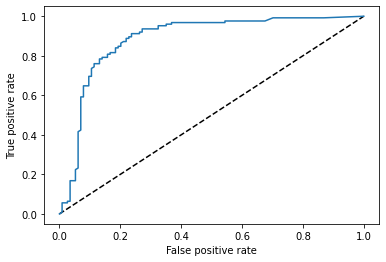

Auc score:
 0.8278947368421051


In [1215]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc score:' '\n', auc_score)

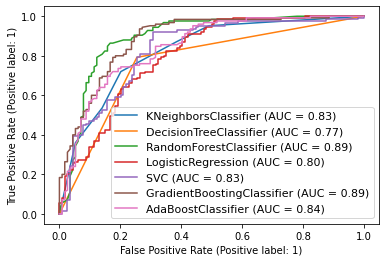

In [1216]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(KNN,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving best model

In [1208]:
import joblib

joblib.dump(final_model, 'Loan_prediction_project.pkl')

['Loan_prediction_project.pkl']

# Predicting save model

In [1209]:
model=joblib.load('Loan_prediction_project.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [1210]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
234,1,1
235,0,0
236,1,1
237,1,1


# Conclusion

Here we can see that the predicted values and original values are almost similiar so our model is working fine. ExtraTreeClassifier is wroking very well here.